# `AA Workshop 5` — Coding Challenge

Complete the tasks below to practice implementing regression modeling from `W5_Regression_Basics.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- running linear regressions with `scikit-learn` using a single or multiple features
- visualizing regression outputs
- comparing training error metrics

## Data

For all following tasks, you will work on the same dataset of ridehailing trips from New York City for a single day (August 1st, 2025). The provided dataset is a subset of the data published by the New York City Taxi & Limousine Commission, which is publicly available [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Load the data (which can be found in the `data`-folder). Then, restrict our sample to trips with a distance of up to 10 miles and a duration of up to 100 minutes. Finally, inspect the data.

In [2]:
# your code here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("../data/ridehailing_NYC_20250801.csv")
df = df[(df.trip_miles<=10) & (df.trip_minutes<=100)].copy()
df.head()


,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_minutes,base_passenger_fare,provider
0,2025-08-01 00:07:01,2025-08-01 00:09:29,2025-08-01 00:22:28,1.5,13,44.43,uber
1,2025-08-01 00:31:28,2025-08-01 00:35:50,2025-08-01 00:46:56,2.1,11,22.20,uber
2,2025-08-01 00:53:16,2025-08-01 00:56:55,2025-08-01 01:18:05,3.0,21,24.81,uber
3,2025-08-01 00:52:57,2025-08-01 00:56:10,2025-08-01 01:02:18,1.3,6,15.15,uber
4,2025-08-01 00:06:10,2025-08-01 00:09:44,2025-08-01 00:26:07,8.3,16,22.84,uber


## Task 1 - Predicting Ridehailing Fares in NYC

Use `scikit-learn` to run a linear regression to predict the `base_passenger_fare` based on `trip_miles`. Then, generate a scatter plot of the observed and predicted values.

In [3]:
import numpy as np

xp = df["trip_miles"]
yp = df["base_passenger_fare"]

linear_model = LinearRegression(fit_intercept=True)

#train model
linear_model.fit(xp.values.reshape((-1,1)), yp)

# predict on new data
Xnew = np.array([[5], [4]])
print(linear_model.predict(Xnew))

[26.11379014 22.51827598]


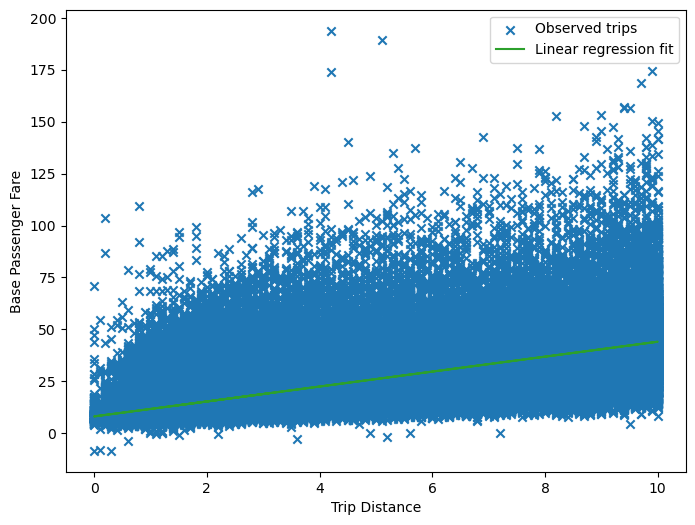

In [4]:
import matplotlib.pyplot as plt
# generate predictions for original data
model_pred = linear_model.predict(xp.values.reshape(-1,1))

fig,ax = plt.subplots(figsize = (8, 6))
ax.scatter(xp, yp, marker="x", label="Observed trips")
ax.set_xlabel("Trip Distance")
ax.set_ylabel("Base Passenger Fare")
ax.plot(xp, model_pred, c="C2", label="Linear regression fit")
ax.legend()
plt.show()


## Task 2 - Distance or Duration?

Which feature is the better predictor of the fare: distance or duration? Compare the mean absolute error on the training set of regression models using `trip_miles` and `trip_minutes` as single predictors, respectively.

In [6]:
# your code here
## MAE
print("MAE distance model:", round(mean_absolute_error(df["base_passenger_fare"], model_pred),2),"$")

# model: trip_minutes
## train model
model_task2 = LinearRegression(fit_intercept=True)
model_task2.fit(df["trip_minutes"].values.reshape((-1,1)), df["base_passenger_fare"])
print("Mean Absolute Error:", mean_squared_error(df["trip_minutes"], model_pred))

# generate predictions
model_task2_pred = model_task2.predict(df["trip_minutes"].values.reshape((-1,1)))

print("MAE time model: ", round(mean_absolute_error(df["base_passenger_fare"], model_task2_pred),2),"$")

MAE distance model: 5.23 $
Mean Absolute Error: 50.699531037661345
MAE time model:  4.96 $


## Task 3 - Uber vs. Lyft

Our dataset also contains information on the provider of each trip, namely Uber or Lyft. Can we use this feature to improve our predictions of the passenger fare? Run a regression using both `trip_minutes` and `provider` as features. Calculate the mean absolute error on the training set, and generate a scatter plot including the regression lines for each provider in different colors.

MAE combined model:  4.96 $


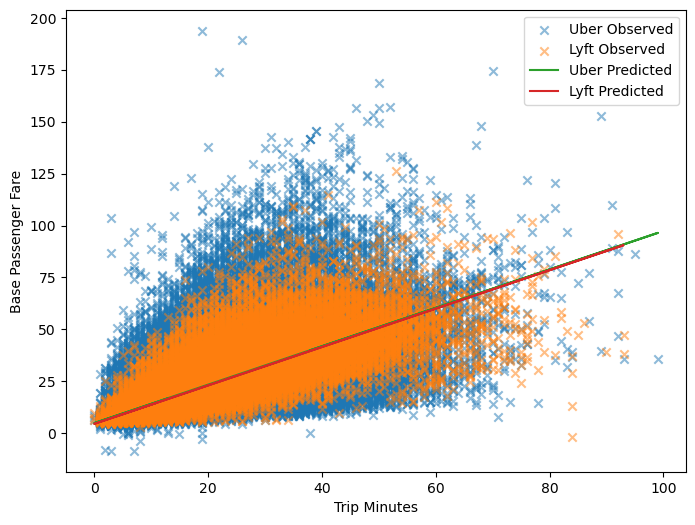

In [10]:
# create two feature vectors for trip_minutes and provider

df["provider_num"] = (df["provider"] == "uber").astype(int) 



#train model
model_task3 = LinearRegression(fit_intercept=True)
model_task3.fit(df[["trip_minutes", "provider_num"]], df["base_passenger_fare"])

# generate predictions
model_task3_pred = model_task3.predict(df[["trip_minutes", "provider_num"]])

print("MAE combined model: ", round(mean_absolute_error(df["base_passenger_fare"], model_task3_pred),2),"$")

# Scatter Plot
# plot
## create two feature vectors for uber and lyft
X_uber = df[df["provider_num"]==1].copy()
X_lyft = df[df["provider_num"]==0].copy()

## predict uber and lyft separately (using the same model!)
y_pred_uber = model_task3.predict(X_uber[["trip_minutes", "provider_num"]])
y_pred_lyft = model_task3.predict(X_lyft[["trip_minutes", "provider_num"]])

# scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_uber["trip_minutes"], X_uber["base_passenger_fare"], marker="x", label="Uber Observed", alpha=0.5)
ax.scatter(X_lyft["trip_minutes"], X_lyft["base_passenger_fare"], marker="x", label="Lyft Observed", alpha=0.5)
ax.plot(X_uber["trip_minutes"], y_pred_uber, c="C2", label="Uber Predicted")
ax.plot(X_lyft["trip_minutes"], y_pred_lyft, c="C3", label="Lyft Predicted")
ax.set_xlabel("Trip Minutes")
ax.set_ylabel("Base Passenger Fare")
ax.legend()
plt.show()